# __Modelos en TensorBoard__

### Cargar Datos

In [3]:
# librerias
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

from tensorflow.keras import regularizers

# libreria para trabajar con las bases de datos 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-15 09:50:22.411180: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 09:50:23.281492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 09:50:23.281670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 09:50:23.620451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 09:50:23.917553: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 09:50:23.924541: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


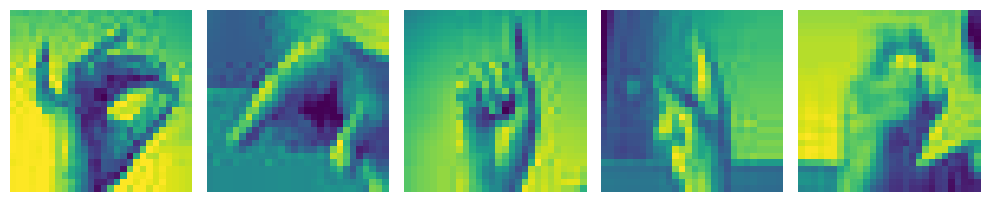

In [4]:
# ruta de los archivos
train_dir = './sign-language-img/Train'
test_dir = './sign-language-img/Test'

# data generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# generator para test, training y validation
# para datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

# para datos de validacion
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

# para datos de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# clases
classes = [char for char in string.ascii_uppercase if char != 'J' if char != 'Z']

# funcion para mostrar las imagenes
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# mostrar 5 imagenes
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

### Modelo a trabajar

In [5]:
# funcion para generalizar la creacion del modelo
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

### Aplicamos TensorBoard

Importaremos el callback de TensorBoard y el módulo nativo de time de Python.

In [6]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

Generaremos un modelo con nuestra función generadora genérica y lo compilaremos con la configuración usual

In [7]:
model_tensorboard = get_model()
model_tensorboard.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2024-11-15 09:55:16.515208: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-15 09:55:16.528510: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-15 09:55:16.540823: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.


Antes de entrenar el modelo crearemos el callback de TensorBoard al que le especificaremos la ruta donde deberá guardar los registros.

In [8]:
callback_tensorboard = TensorBoard(log_dir=f'logs/{time()}')

2024-11-15 09:56:46.633584: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-15 09:56:46.633740: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-15 09:56:46.634642: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
